In [1]:
import pandas as pd
import numpy as np

fake_filepath = r"C:\Users\vm658\Documents\SVSM\Research\Code\DataSet_Misinfo_FAKE.csv"
true_filepath = r"C:\Users\vm658\Documents\SVSM\Research\Code\DataSet_Misinfo_TRUE.csv"

In [2]:
fake_df = pd.read_csv(fake_filepath)
fake_df['label'] = 0
#remove first column
fake_df = fake_df.drop(fake_df.columns[0], axis=1)
#drop empty rows
fake_df = fake_df.dropna(how = 'any')
fake_df.drop_duplicates(subset = ['text'], inplace=True)

In [3]:
true_df = pd.read_csv(true_filepath, encoding = 'latin-1')
true_df['label'] = 1
#remove first column
true_df = true_df.drop(true_df.columns[0], axis=1)
#drop empty rows
true_df = true_df.dropna(how = 'any')
true_df.drop_duplicates(subset = ['text'], inplace=True)

In [4]:
df=pd.concat([true_df,fake_df])

In [5]:
import string

#add more punctuation
punctuations = string.punctuation + "’‘“”"
#remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in punctuations])
    return no_punct

In [6]:
#remove punctuation
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
#make all text lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

In [7]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2, random_state = 1)


In [8]:
#fake_test_data = pd.read_csv(r"C:\Users\vm658\Documents\SVSM\Research\Code\Fake.csv")
#true_test_data = pd.read_csv(r"C:\Users\vm658\Documents\SVSM\Research\Code\True.csv")

#fake_test_data['label'] = 0
#true_test_data['label'] = 1

#combine the dataframes
#test_df = pd.concat([fake_test_data,true_test_data])

#remove the subject and date
#test_df = test_df.drop(['subject','date'], axis=1)
#test_df = test_df.dropna(how = 'any')
#test_df.drop_duplicates(subset = ['title'], inplace=True)

#remove punctuation
#test_df['text'] = test_df['text'].apply(lambda x: remove_punctuation(x))
#make all text lowercase
#test_df['text'] = test_df['text'].apply(lambda x: x.lower())

In [9]:
test_df = pd.read_csv(r"C:\Users\vm658\Documents\SVSM\Research\Code\fake_or_real_news.csv")

#relabel fake and true data as 0 and 1
test_df['label'] = test_df.label.map({'FAKE': 0, 'REAL': 1})

test_df = test_df.drop(['Unnamed: 0'], axis=1)
test_df = test_df.dropna(how = 'any')
test_df.drop_duplicates(subset = ['title'], inplace=True)

#remove punctuation
test_df['title'] = test_df['title'].apply(lambda x: remove_punctuation(x))
#make all text lowercase
#test_df['title'] = test_df['title'].apply(lambda x: x.lower())


#remove punctuation
test_df['text'] = test_df['text'].apply(lambda x: remove_punctuation(x))
#make all text lowercase
test_df['text'] = test_df['text'].apply(lambda x: x.lower())

In [10]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import pickle

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['said', "'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'])
stop_words.extend(['is', 'it', 'to', 'be', 'said', 'he', 'one', 'that', 'also', 'in', 'this', 'are', 'an', 'you', 'they'])
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vm658\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
'''cmaps = {'Train_data': 'Greys',
         'Test_titles': 'GnBu',
         'Test_text': 'Wistia'}'''

def test(model, algorithm_name, x_test, y_test, cmap):
    #test the model
    prediction = model.predict(x_test)
    score = metrics.accuracy_score(y_test, prediction)
    print(f"{algorithm_name} accuracy:   %0.3f" % (score*100))
    print(f'{algorithm_name}\n',classification_report(y_test, prediction, target_names=['Fake','True']))
    cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])

    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True,
                                    cmap = cmap)
    ax.set_title(f'{algorithm_name} Confusion Matrix')
    plt.show()

In [12]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

MNB_model = pipe.fit(x_train, y_train)

Multinomial NB accuracy:   89.563
Multinomial NB
               precision    recall  f1-score   support

        Fake       0.98      0.81      0.88      6746
        True       0.84      0.98      0.91      6975

    accuracy                           0.90     13721
   macro avg       0.91      0.89      0.89     13721
weighted avg       0.91      0.90      0.89     13721



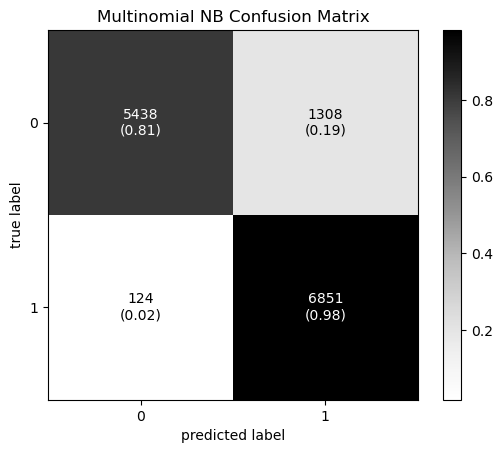

Multinomial NB accuracy:   65.137
Multinomial NB
               precision    recall  f1-score   support

        Fake       0.62      0.77      0.69      3107
        True       0.70      0.54      0.61      3149

    accuracy                           0.65      6256
   macro avg       0.66      0.65      0.65      6256
weighted avg       0.66      0.65      0.65      6256



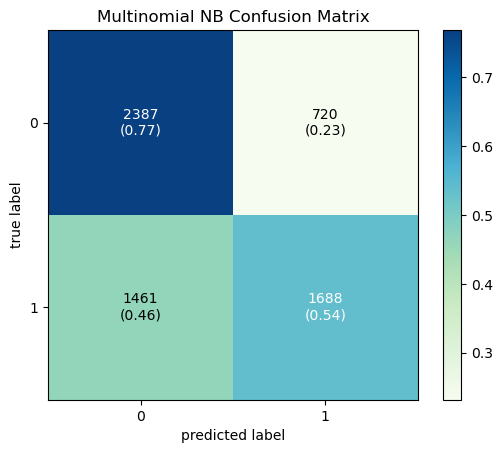

Multinomial NB accuracy:   77.845
Multinomial NB
               precision    recall  f1-score   support

        Fake       0.78      0.78      0.78      3107
        True       0.78      0.78      0.78      3149

    accuracy                           0.78      6256
   macro avg       0.78      0.78      0.78      6256
weighted avg       0.78      0.78      0.78      6256



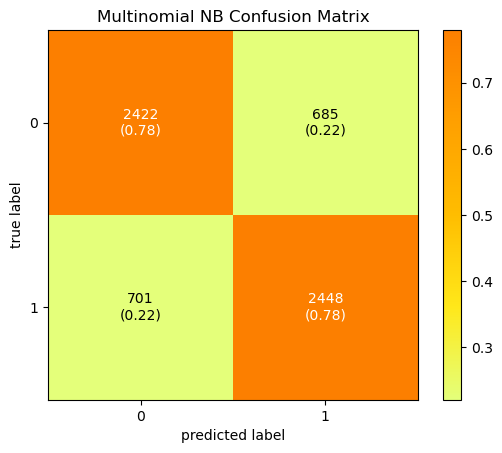

In [13]:
test(MNB_model, "Multinomial NB", x_test, y_test, 'Greys')
test(MNB_model, "Multinomial NB", test_df['title'], test_df['label'], 'GnBu')
test(MNB_model, "Multinomial NB", test_df['text'], test_df['label'], 'Wistia')

In [14]:
#SVC
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

SVC_model = pipe.fit(x_train, y_train)

SVC accuracy:   97.296
SVC
               precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      6746
        True       0.98      0.97      0.97      6975

    accuracy                           0.97     13721
   macro avg       0.97      0.97      0.97     13721
weighted avg       0.97      0.97      0.97     13721



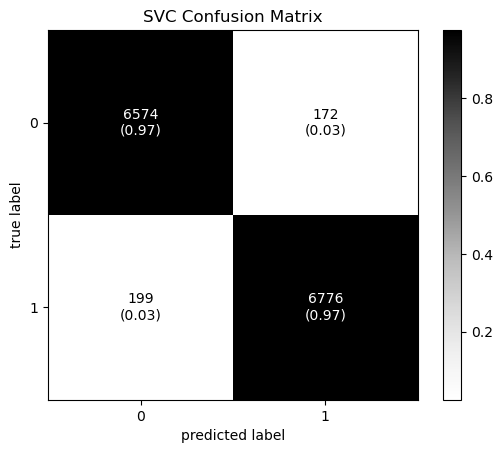

SVC accuracy:   53.868
SVC
               precision    recall  f1-score   support

        Fake       0.52      0.98      0.68      3107
        True       0.87      0.10      0.18      3149

    accuracy                           0.54      6256
   macro avg       0.69      0.54      0.43      6256
weighted avg       0.69      0.54      0.43      6256



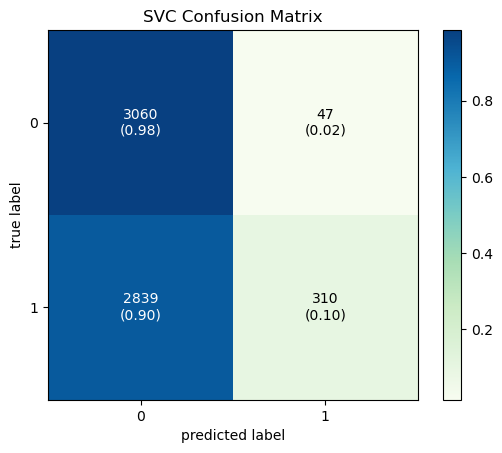

SVC accuracy:   90.489
SVC
               precision    recall  f1-score   support

        Fake       0.85      0.99      0.91      3107
        True       0.99      0.82      0.90      3149

    accuracy                           0.90      6256
   macro avg       0.92      0.91      0.90      6256
weighted avg       0.92      0.90      0.90      6256



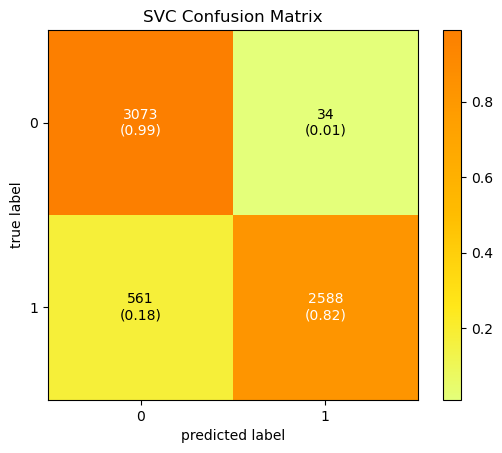

In [15]:
#test the models
test(SVC_model, "SVC", x_test, y_test, 'Greys')
test(SVC_model, "SVC", test_df['title'], test_df['label'], 'GnBu')
test(SVC_model, "SVC", test_df['text'], test_df['label'], 'Wistia')

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

LR_model = pipe.fit(x_train, y_train)

c:\Users\vm658\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy:   95.919
Logistic Regression
               precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      6746
        True       0.96      0.96      0.96      6975

    accuracy                           0.96     13721
   macro avg       0.96      0.96      0.96     13721
weighted avg       0.96      0.96      0.96     13721



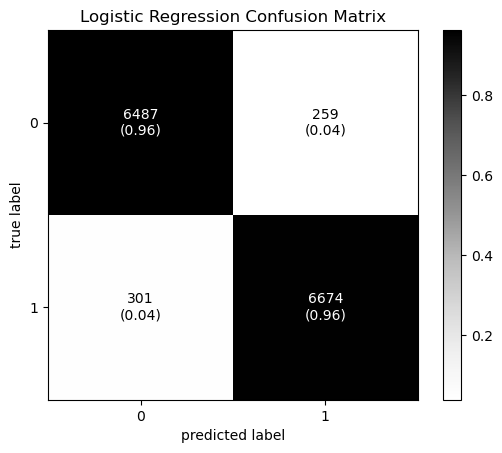

Logistic Regression accuracy:   50.879
Logistic Regression
               precision    recall  f1-score   support

        Fake       0.50      1.00      0.67      3107
        True       0.90      0.03      0.05      3149

    accuracy                           0.51      6256
   macro avg       0.70      0.51      0.36      6256
weighted avg       0.70      0.51      0.36      6256



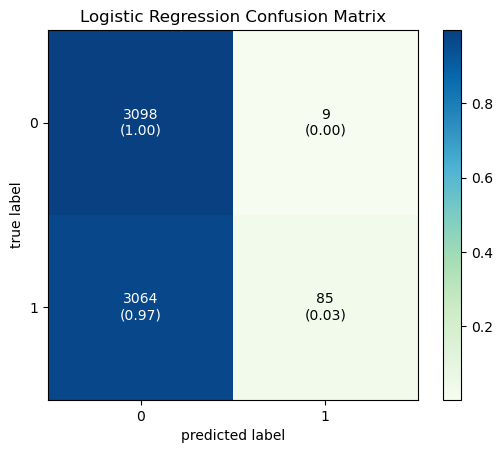

Logistic Regression accuracy:   81.330
Logistic Regression
               precision    recall  f1-score   support

        Fake       0.74      0.95      0.84      3107
        True       0.94      0.68      0.78      3149

    accuracy                           0.81      6256
   macro avg       0.84      0.81      0.81      6256
weighted avg       0.84      0.81      0.81      6256



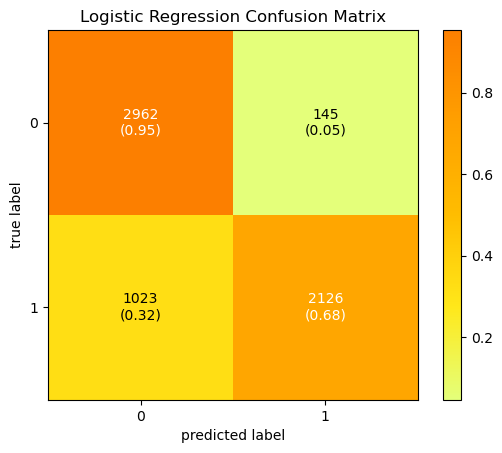

In [17]:
#test the model
test(LR_model, "Logistic Regression", x_test, y_test, 'Greys')
test(LR_model, "Logistic Regression", test_df['title'], test_df['label'], 'GnBu')
test(LR_model, "Logistic Regression", test_df['text'], test_df['label'], 'Wistia')

In [18]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

PAC_model = pipe.fit(x_train, y_train)

Passive Aggressive Classifier accuracy:   97.282
Passive Aggressive Classifier
               precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      6746
        True       0.98      0.97      0.97      6975

    accuracy                           0.97     13721
   macro avg       0.97      0.97      0.97     13721
weighted avg       0.97      0.97      0.97     13721



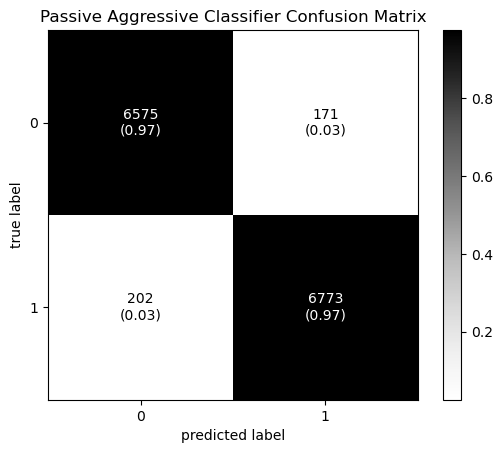

Passive Aggressive Classifier accuracy:   56.889
Passive Aggressive Classifier
               precision    recall  f1-score   support

        Fake       0.54      0.96      0.69      3107
        True       0.83      0.18      0.30      3149

    accuracy                           0.57      6256
   macro avg       0.68      0.57      0.49      6256
weighted avg       0.69      0.57      0.49      6256



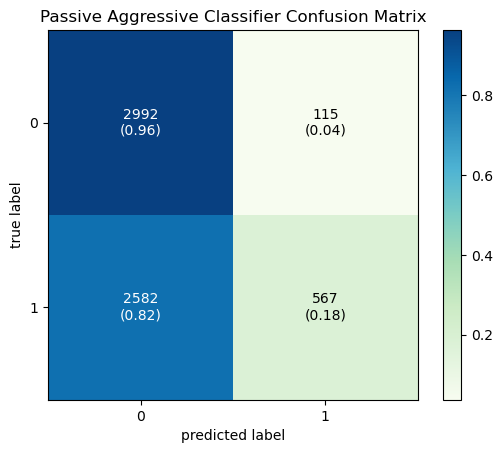

Passive Aggressive Classifier accuracy:   92.327
Passive Aggressive Classifier
               precision    recall  f1-score   support

        Fake       0.87      0.99      0.93      3107
        True       0.99      0.85      0.92      3149

    accuracy                           0.92      6256
   macro avg       0.93      0.92      0.92      6256
weighted avg       0.93      0.92      0.92      6256



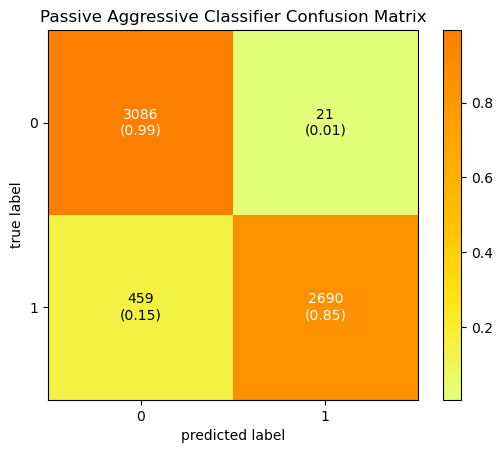

In [19]:
#test the model
test(PAC_model, "Passive Aggressive Classifier", x_test, y_test, 'Greys')
test(PAC_model, "Passive Aggressive Classifier", test_df['title'], test_df['label'], 'GnBu')
test(PAC_model, "Passive Aggressive Classifier", test_df['text'], test_df['label'], 'Wistia')